# Polarization behaviors on Twitter

This notebook contains the code to construct figures of the paper.

# Libraries import

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D

# Definition of timeframes

In [4]:
from datetime import datetime, date, timedelta

In [5]:
#List of periods of length w (in weeks) and c week(s) between
def get_periods(w,c):
    # start_date = datetime.strptime('2022-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
    # end_date = datetime.strptime('2022-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
    # last_date = datetime.strptime('2022-07-31 23:59:39', '%Y-%m-%d %H:%M:%S')
    start_date = pd.Timestamp('2022-01-01 00:00:00')
    end_date = pd.Timestamp('2022-01-01 00:00:00')
    last_date = pd.Timestamp('2022-07-31 23:59:39')
    list_periods = []
    while end_date < last_date:
        end_date = start_date + timedelta(weeks=w) +timedelta(hours=23) + timedelta(minutes=59)+ timedelta(seconds=59)
        list_periods.append([start_date, end_date])
        if (w==c):
            start_date = start_date + timedelta(weeks=c) + timedelta(days=1)
        else:
            start_date = start_date + timedelta(weeks=c)
    list_periods[-1][1] = last_date
    return list_periods

In [6]:
periods = get_periods(4,2)

# Data import

All the necessary data to construct the figures are imported.

In [8]:
#global_data = pd.read_csv('../results/holistic_analysis/vaccine_debate_final_data.csv', index_col=0)
global_data = pd.read_csv('../results/holistic_analysis/ukraine_conflict_debate_final_data.csv', index_col=0)

In [11]:
# H_opinions = pd.read_csv('../results/temporal_analysis/factors_timeframes/vaccine_opinions.csv', index_col=0)
# H_sources1 = pd.read_csv('../results/temporal_analysis/factors_timeframes/vaccine_sources_C1.csv', index_col=0)
# H_sources2 = pd.read_csv('../results/temporal_analysis/factors_timeframes/vaccine_sources_C2.csv', index_col=0)

H_opinions = pd.read_csv('../results/temporal_analysis/factors_timeframes/ukraine_conflict_opinions.csv', index_col=0)
H_sources1 = pd.read_csv('../results/temporal_analysis/factors_timeframes/ukraine_conflict_sources_C1.csv', index_col=0)
H_sources2 = pd.read_csv('../results/temporal_analysis/factors_timeframes/ukraine_conflict_sources_C2.csv', index_col=0)

In [12]:
def transform(x):
    return (x+1)/2

In [14]:
H_opinions_trans = H_opinions.applymap(transform)

In [101]:
grail_temporal = pd.read_csv('../results/temporal_analysis/ukraine_conflict_grail_temporal.csv', index_col=0)

In [96]:
#clusters = pd.read_csv('../results/temporal_analysis/vaccine_clusters_labels.csv', index_col=0)
clusters = pd.read_csv('../results/temporal_analysis/ukraine_conflict_clusters_labels.csv', index_col=0)

In [16]:
# lists_users = pd.read_csv('../results/temporal_analysis/vaccine_lists_users.csv', index_col=0)
# inter_users = lists_users.loc[0,'inter']
# provax_users = lists_users.loc[0,'C1']
# antivax_users = lists_users.loc[0,'C2']


lists_users = pd.read_csv('../results/temporal_analysis/ukraine_conflict_lists_users.csv', index_col=0)
inter_users = lists_users.loc[0,'inter']
proU_users = lists_users.loc[0,'C1']
proR_users = lists_users.loc[0,'C2']

In [111]:
dynamics = pd.read_csv('../results/temporal_analysis/ukraine_conflict_dynamics.csv', index_col=0)

# Definition of global paramaters for the figures

In [ ]:
plt.rcParams['grid.linewidth'] = 0.1   # change linwidth
plt.rcParams['grid.color'] = "gray" # change color
plt.rcParams['font.family'] = "serif"

# Clustering over time frames

## Comparison of the evolution of the number of identified clusted between the two debates

In [19]:
nb_vacc = [4,4,4,2,2,2,2,2,2,2,2,2,2,2,2]
nb_ukr = [8,9,3,3,4,4,4,4,4,4,4,4,4,2,2]

In [20]:
nb_clusters = pd.DataFrame(columns=['Covid-19 vaccine debate', 'Ukraine conflict debate'])
nb_clusters['Covid-19 vaccine debate'] = nb_vacc
nb_clusters['Ukraine conflict debate'] = nb_ukr

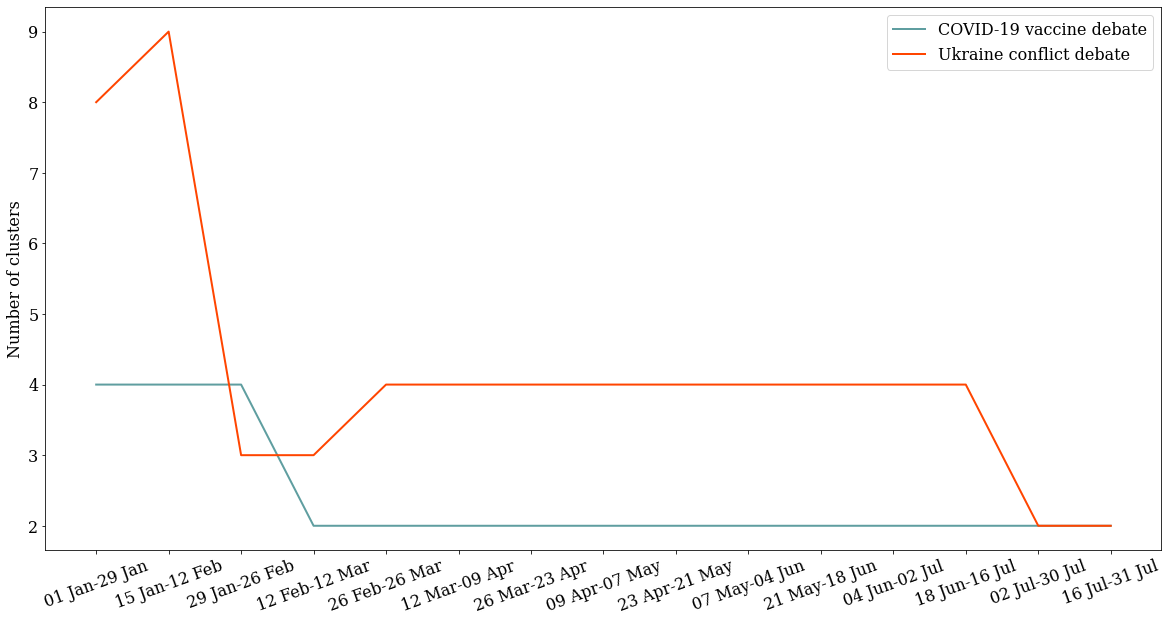

In [22]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(nb_clusters['Covid-19 vaccine debate'],color='cadetblue', linewidth=2)
ax.plot(nb_clusters['Ukraine conflict debate'],color='orangered', linewidth=2)


ax.set_ylabel('Number of clusters', fontsize='16')

labels = []
for p in range(len(periods)):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize='16')
ax.legend(['COVID-19 vaccine debate','Ukraine conflict debate'], fontsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()

# Clusters in a 3D space

In [24]:
#Get weighted factors
# global_data['x_final_alpha'] = 0.6*global_data['x_final']
# global_data['y_C1_final_alpha'] = 0.2*global_data['y_pro_final']
# global_data['y_C2_final_alpha'] = 0.2*global_data['y_anti_final']


global_data['x_final_alpha'] = 0.6*global_data['x_final']
global_data['y_C1_final_alpha'] = 0.2*global_data['y_proU_final']
global_data['y_C2_final_alpha'] = 0.2*global_data['y_proR_final']

In [27]:
X_glob = global_data[['x_final_alpha','y_C1_final_alpha','y_C2_final_alpha','cluster']]
X_glob.columns = ['x','y_C1','y_C2','cluster']

In [28]:
X_glob.head(2)

,x,y_C1,y_C2,cluster
S0U,0.170169,0.094724,0.118308,2
S1U,0.000000,0.000000,0.164993,1


In [35]:
users = clusters.columns.tolist()

In [37]:
a=1/2
def f_sigmoid_optim(x):
    return(x**(a)/(x**(a)+(1-x)**(a)))

In [38]:
H_opinions = H_opinions.apply(f_sigmoid_optim)
H_sources1 = H_sources1.apply(f_sigmoid_optim)
H_sources2 = H_sources2.apply(f_sigmoid_optim)

## COVID-19 vaccine debate

### Clusters over the entire period

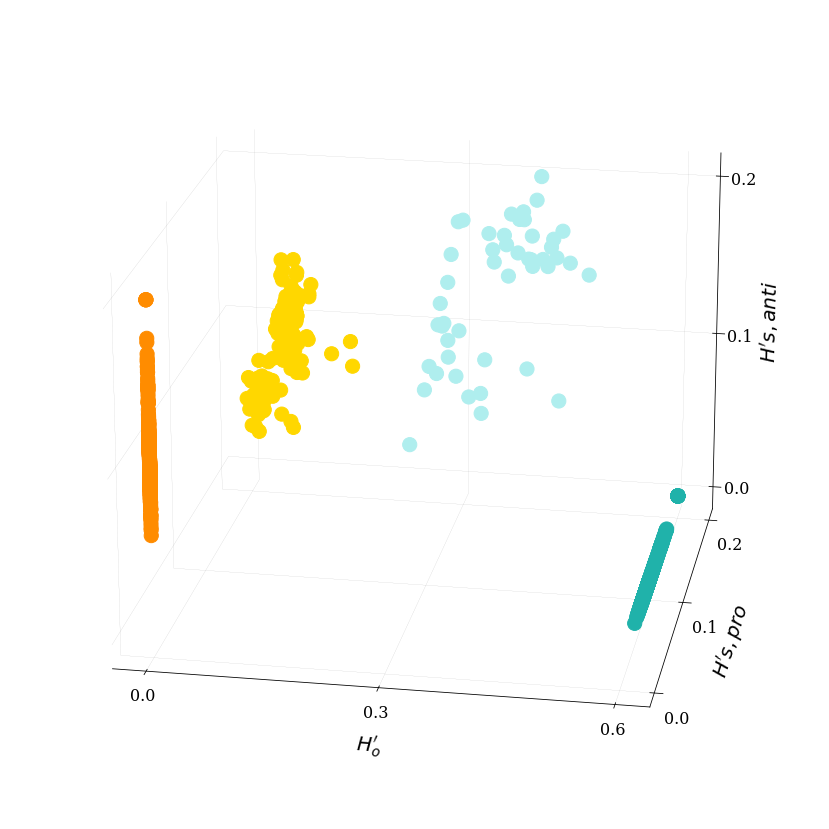

In [23]:
cluster_1_vacc=  X_glob[X_glob['cluster']==0]
cluster_2_vacc = X_glob[X_glob['cluster']==1]
cluster_3_vacc = X_glob[X_glob['cluster']==2]
cluster_4_vacc = X_glob[X_glob['cluster']==3]



fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

#unique_markers = set(X_clusters['cluster_entropy_3d_k4'])
#mapping = ['o','^','x','*']
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("Spectral", 256).as_hex())

ax.scatter(cluster_1_vacc['x'], cluster_1_vacc['y_C1'], cluster_1_vacc['y_C2'], marker ='o', c='lightseagreen', s= 200, alpha=1)
ax.scatter(cluster_2_vacc['x'], cluster_2_vacc['y_C1'], cluster_2_vacc['y_C2'], marker ='o', c='darkorange', s= 200, alpha=1)
ax.scatter(cluster_3_vacc['x'], cluster_3_vacc['y_C1'], cluster_3_vacc['y_C2'], marker ='o', c='gold', s= 200, alpha=1)
ax.scatter(cluster_4_vacc['x'], cluster_4_vacc['y_C1'], cluster_4_vacc['y_C2'], marker ='o', c='paleturquoise', s= 200, alpha=1)

# ax.scatter(cluster_1_vacc['x'], cluster_1_vacc['y_C1'], cluster_1_vacc['y_C2'], marker ='o', c='orangered', s= 100, alpha=1)
# ax.scatter(cluster_2_vacc['x'], cluster_2_vacc['y_C1'], cluster_2_vacc['y_C2'], marker ='o', c='darkcyan', s= 100, alpha=1)
# ax.scatter(cluster_3_vacc['x'], cluster_3_vacc['y_C1'], cluster_3_vacc['y_C2'], marker ='o', c='', s= 100, alpha=1)
# ax.scatter(cluster_4_vacc['x'], cluster_4_vacc['y_C1'], cluster_4_vacc['y_C2'], marker ='o', c='orange', s= 100, alpha=1)


ax.grid(color='b', ls = '-.', lw = 0.25)
# ax.set_xlabel(r'$H_o$', fontsize='20', labelpad=10)
# ax.set_ylabel(r'$H_{s,pro}$', fontsize='20', labelpad=10)
# ax.set_zlabel(r'$H_{s,anti}$', fontsize='20', labelpad=10)

ax.set_xlabel(r'$H^\prime_o$', fontsize='20', labelpad=20)
ax.set_ylabel(r'$H^\prime{s,pro}$', fontsize='20', labelpad=20)
ax.set_zlabel(r'$H^\prime{s,anti}$', fontsize='20', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)



ax.view_init(20, -80)

### Clusters for each time frame

In [44]:
P1_vacc = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P1_vacc['x'] = 0.6 * H_opinions.iloc[0,]
P1_vacc['y_C1'] = 0.2 * H_sources1.iloc[0,]
P1_vacc['y_C2'] = 0.2 * H_sources2.iloc[0,]

for u in users:
    P1_vacc.loc[u,'cluster'] = clusters.loc[0,u]

In [45]:
P1_vacc['cluster'].value_counts()

proR     435
proU     335
inter     14
Name: cluster, dtype: int64

In [30]:
inter_users = P1_vacc[P1_vacc['cluster']=='interPro'].index.tolist() + P1_vacc[P1_vacc['cluster']=='interAnti'].index.tolist() 

In [31]:
len(inter_users)

105

In [32]:
P2_vacc = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P2_vacc['x'] = 0.6 * H_comm_cumul_trans_vacc.iloc[14,]
P2_vacc['y_C1'] = 0.2 * H_sources1_cumul_vacc.iloc[14,]
P2_vacc['y_C2'] = 0.2 * H_sources2_cumul_vacc.iloc[14,]

for u in users_vacc:
    P2_vacc.loc[u,'cluster'] = clusters_vacc.loc[14,u]

In [33]:
P2_vacc['cluster'].value_counts()

anti    454
pro     231
Name: cluster, dtype: int64

In [55]:
%matplotlib inline

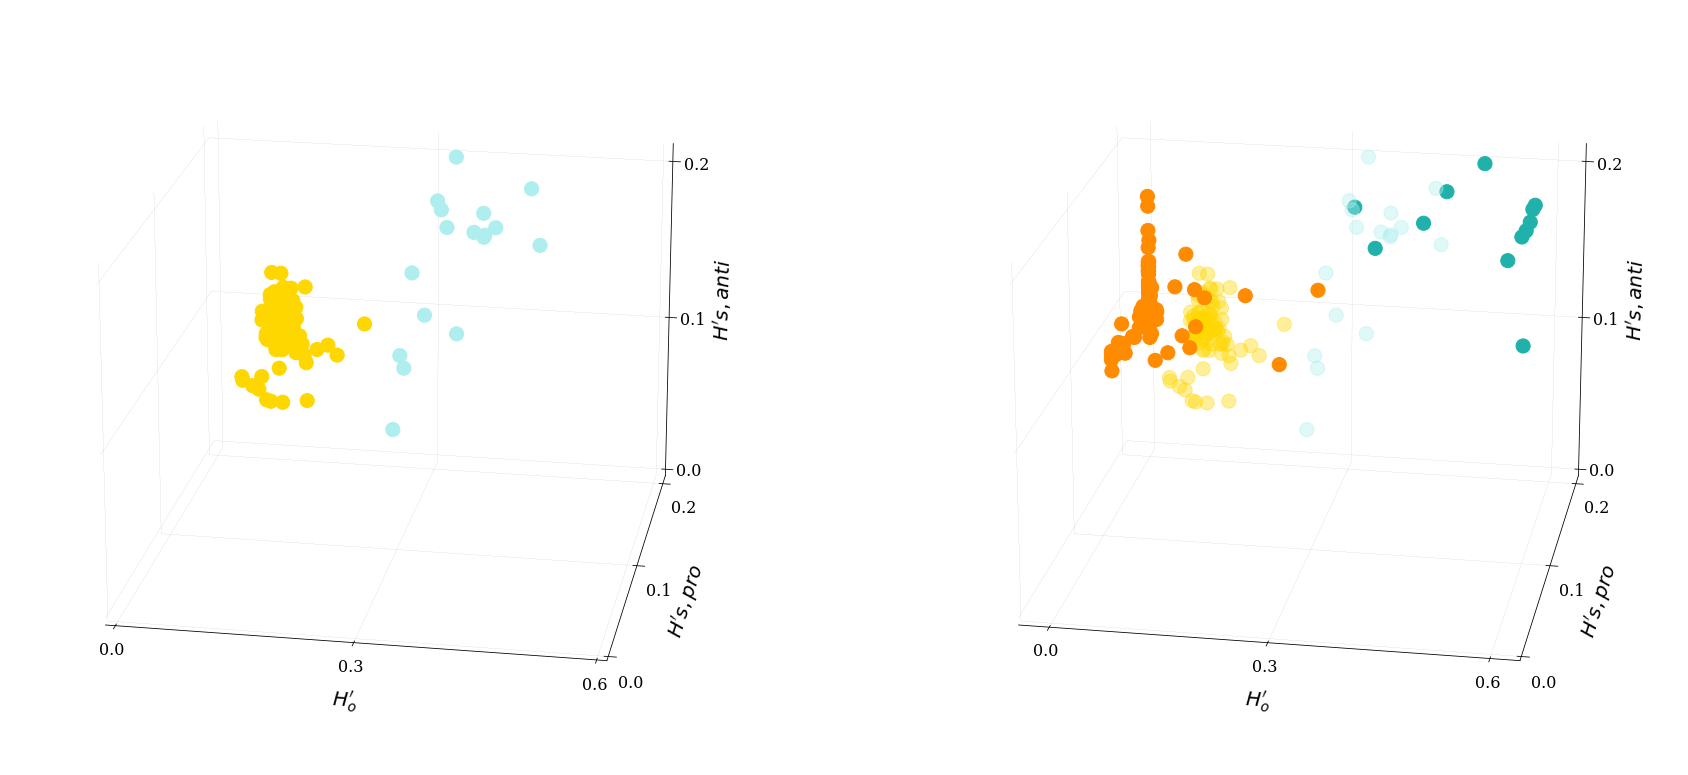

In [68]:
# cluster_1_P1 = P1_vacc[P1_vacc['cluster']=='pro']
# cluster_2_P1 = P1_vacc[P1_vacc['cluster']=='anti']
cluster_3_P1 = P1_vacc[P1_vacc['cluster']=='interAnti']
cluster_4_P1 = P1_vacc[P1_vacc['cluster']=='interPro']

cluster_1_P2 = P2_vacc[(P2_vacc['cluster']=='pro') & (P2_vacc.index.isin(inter_users))]
cluster_2_P2 = P2_vacc[(P2_vacc['cluster']=='anti') & (P2_vacc.index.isin(inter_users))]

fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='gold', s= 200, alpha=1)
ax.scatter(cluster_4_P1['x'], cluster_4_P1['y_C1'], cluster_4_P1['y_C2'], marker ='o', c='paleturquoise', s= 200, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel(r'$H^\prime_o$', fontsize='20', labelpad=20)
ax.set_ylabel(r'$H^\prime{s,pro}$', fontsize='20', labelpad=20)
ax.set_zlabel(r'$H^\prime{s,anti}$', fontsize='20', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)


ax = fig.add_subplot(1, 2, 2, projection='3d')
#ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='gold', s= 200, alpha=0.4)
ax.scatter(cluster_4_P1['x'], cluster_4_P1['y_C1'], cluster_4_P1['y_C2'], marker ='o', c='paleturquoise', s= 200, alpha=0.4)
ax.scatter(cluster_1_P2['x'], cluster_1_P2['y_C1'], cluster_1_P2['y_C2'], marker ='o', c='lightseagreen', s= 200, alpha=1)
ax.scatter(cluster_2_P2['x'], cluster_2_P2['y_C1'], cluster_2_P2['y_C2'], marker ='o', c='darkorange', s= 200, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel(r'$H^\prime_o$', fontsize='20', labelpad=20)
ax.set_ylabel(r'$H^\prime{s,pro}$', fontsize='20', labelpad=20)
ax.set_zlabel(r'$H^\prime{s,anti}$', fontsize='20', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)

## Ukraine

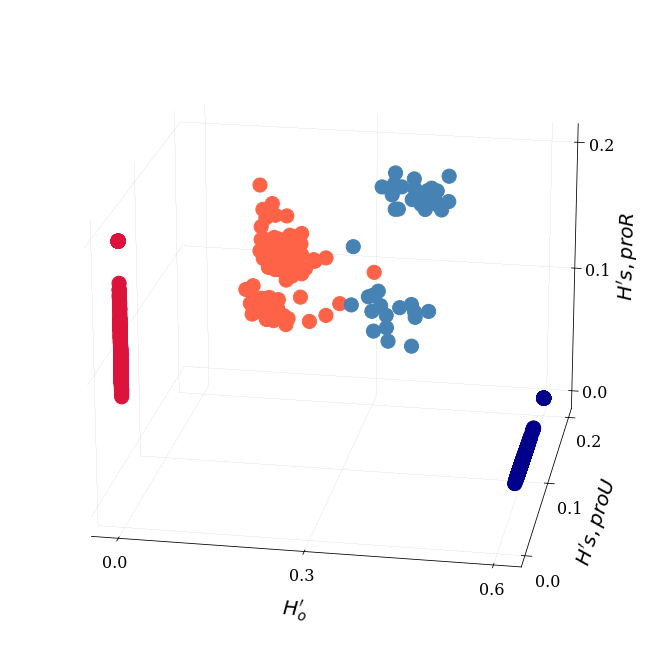

In [46]:
cluster_1_ukr=  X_glob[X_glob['cluster']==0]
cluster_2_ukr = X_glob[X_glob['cluster']==1]
cluster_3_ukr = X_glob[X_glob['cluster']==2]
cluster_4_ukr = X_glob[X_glob['cluster']==3]



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

#unique_markers = set(X_clusters['cluster_entropy_3d_k4'])
#mapping = ['o','^','x','*']
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("Spectral", 256).as_hex())

ax.scatter(cluster_1_ukr['x'], cluster_1_ukr['y_C1'], cluster_1_ukr['y_C2'], marker ='o', c='darkblue', s= 200, alpha=1)
ax.scatter(cluster_2_ukr['x'], cluster_2_ukr['y_C1'], cluster_2_ukr['y_C2'], marker ='o', c='crimson', s= 200, alpha=1)
ax.scatter(cluster_3_ukr['x'], cluster_3_ukr['y_C1'], cluster_3_ukr['y_C2'], marker ='o', c='tomato', s= 200, alpha=1)
ax.scatter(cluster_4_ukr['x'], cluster_4_ukr['y_C1'], cluster_4_ukr['y_C2'], marker ='o', c='steelblue', s= 200, alpha=1)


ax.grid(color='b', ls = '-.', lw = 0.25)
# ax.set_xlabel(r'$H_o$', fontsize='20', labelpad=10)
# ax.set_ylabel(r'$H_{s,pro}$', fontsize='20', labelpad=10)
# ax.set_zlabel(r'$H_{s,anti}$', fontsize='20', labelpad=10)


ax.set_xlabel(r'$H^\prime_o$', fontsize='20', labelpad=20)
ax.set_ylabel(r'$H^\prime{s,proU}$', fontsize='20', labelpad=20)
ax.set_zlabel(r'$H^\prime{s,proR}$', fontsize='20', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)

### Clusters périodes

In [57]:
P1_ukr = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P1_ukr['x'] = 0.6 * H_opinions_trans.iloc[3,]
P1_ukr['y_C1'] = 0.2 * H_sources1.iloc[3,]
P1_ukr['y_C2'] = 0.2 * H_sources2.iloc[3,]

for u in users:
    P1_ukr.loc[u,'cluster'] = clusters.loc[3,u]

In [58]:
P1_ukr['cluster'].value_counts()

proR     391
proU     317
inter     76
Name: cluster, dtype: int64

In [60]:
inter_users_ukr = P1_ukr[P1_ukr['cluster']=='inter'].index.tolist()

In [69]:
P2_ukr = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P2_ukr['x'] = 0.6 * H_opinions_trans.iloc[10,]
P2_ukr['y_C1'] = 0.2 * H_sources1.iloc[10,]
P2_ukr['y_C2'] = 0.2 * H_sources2.iloc[10,]

for u in users:
    P2_ukr.loc[u,'cluster'] = clusters.loc[10,u]

In [70]:
P2_ukr['cluster'].value_counts()

proU      313
proR      305
interR    134
interU     32
Name: cluster, dtype: int64

In [71]:
P3_ukr = pd.DataFrame(columns=['x','y_C1','y_C2','cluster'])
P3_ukr['x'] = 0.6 * H_opinions_trans.iloc[14,]
P3_ukr['y_C1'] = 0.2 * H_sources1.iloc[14,]
P3_ukr['y_C2'] = 0.2 * H_sources2.iloc[14,]

for u in users:
    P3_ukr.loc[u,'cluster'] = clusters.loc[14,u]

In [72]:
P3_ukr['cluster'].value_counts()

proR    440
proU    344
Name: cluster, dtype: int64

In [73]:
%matplotlib inline

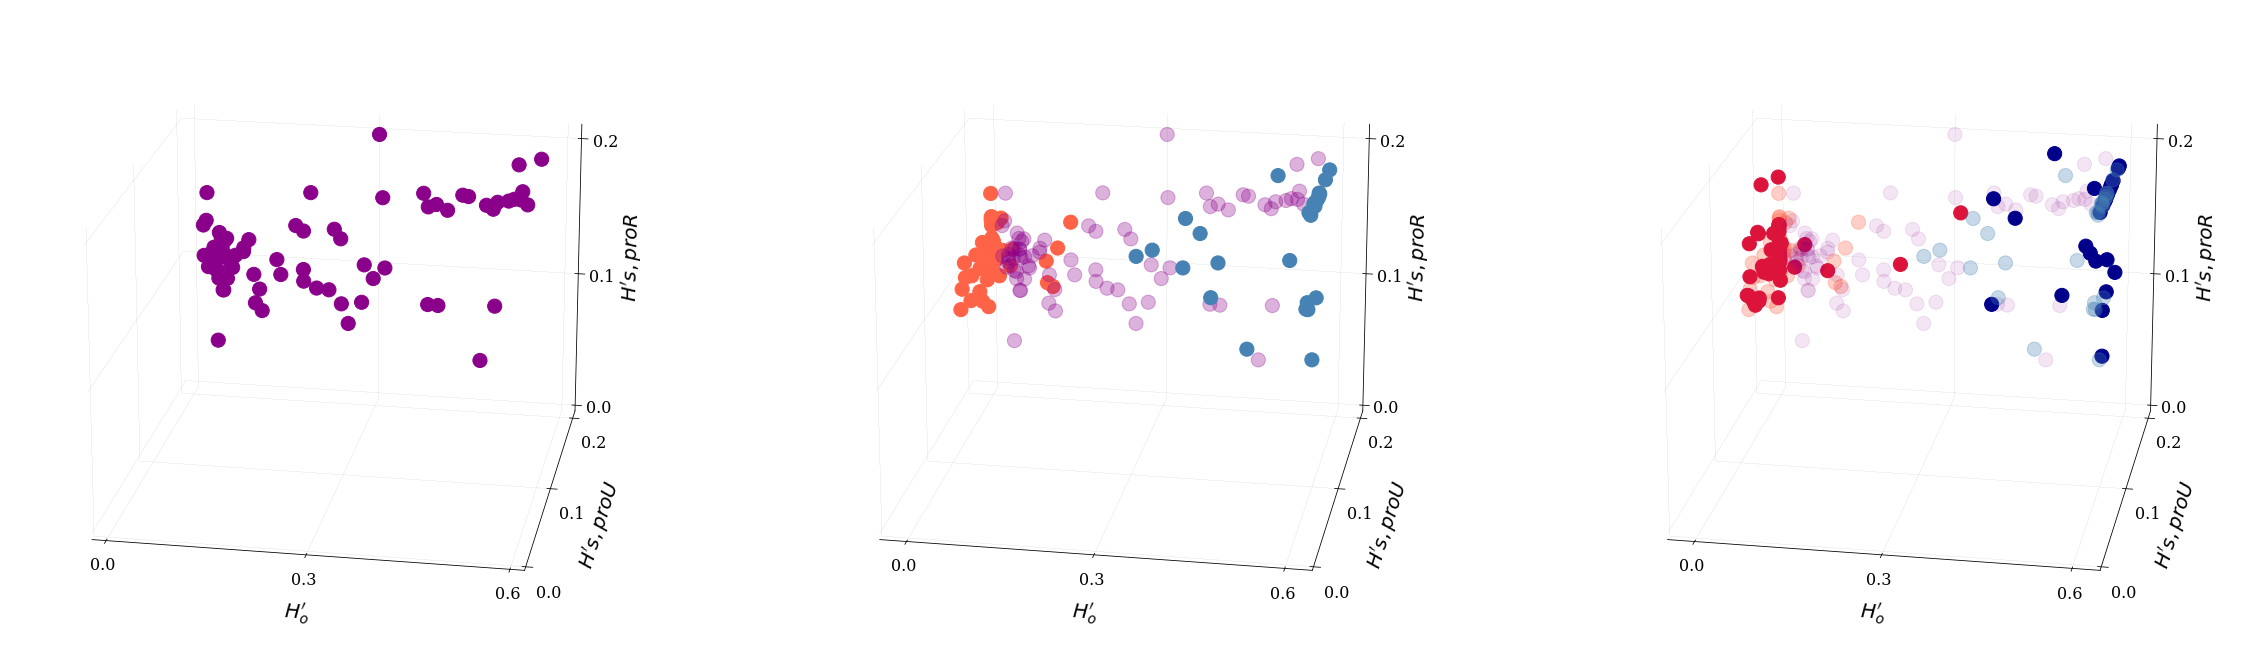

In [74]:
cluster_1_P1 = P1_ukr[P1_ukr['cluster']=='proR']
cluster_2_P1 = P1_ukr[P1_ukr['cluster']=='proU']
cluster_3_P1 = P1_ukr[P1_ukr['cluster']=='inter']

cluster_1_P2 = P2_ukr[P2_ukr['cluster']=='proR']
cluster_2_P2 = P2_ukr[P2_ukr['cluster']=='proU']
cluster_3_P2 = P2_ukr[(P2_ukr['cluster']=='interR') & P2_ukr.index.isin(inter_users_ukr)]
cluster_4_P2 = P2_ukr[(P2_ukr['cluster']=='interU') & P2_ukr.index.isin(inter_users_ukr)]

cluster_1_P3 = P3_ukr[(P3_ukr['cluster']=='proR') & P3_ukr.index.isin(inter_users_ukr)]
cluster_2_P3 = P3_ukr[(P3_ukr['cluster']=='proU') & P3_ukr.index.isin(inter_users_ukr)]


fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(1,3,1, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='darkmagenta', s= 200, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_xlabel(r'$H^\prime_o$', fontsize='20', labelpad=20)
ax.set_ylabel(r'$H^\prime{s,proU}$', fontsize='20', labelpad=20)
ax.set_zlabel(r'$H^\prime{s,proR}$', fontsize='20', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)

ax = fig.add_subplot(1,3,2, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='darkmagenta', s= 200, alpha=0.3)

ax.scatter(cluster_3_P2['x'], cluster_3_P2['y_C1'], cluster_3_P2['y_C2'], marker ='o', c='tomato', s= 200, alpha=1)
ax.scatter(cluster_4_P2['x'], cluster_4_P2['y_C1'], cluster_4_P2['y_C2'], marker ='o', c='steelblue', s= 200, alpha=1)

ax.grid(color='b', ls = '-.', lw = 0.25)


ax.set_xlabel(r'$H^\prime_o$', fontsize='20', labelpad=20)
ax.set_ylabel(r'$H^\prime{s,proU}$', fontsize='20', labelpad=20)
ax.set_zlabel(r'$H^\prime{s,proR}$', fontsize='20', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)

ax = fig.add_subplot(1,3,3, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.scatter(cluster_3_P1['x'], cluster_3_P1['y_C1'], cluster_3_P1['y_C2'], marker ='o', c='darkmagenta', s= 200, alpha=0.1)

ax.scatter(cluster_3_P2['x'], cluster_3_P2['y_C1'], cluster_3_P2['y_C2'], marker ='o', c='tomato', s= 200, alpha=0.3)
ax.scatter(cluster_4_P2['x'], cluster_4_P2['y_C1'], cluster_4_P2['y_C2'], marker ='o', c='steelblue', s= 200, alpha=0.3)

ax.scatter(cluster_1_P3['x'], cluster_1_P3['y_C1'], cluster_1_P3['y_C2'], marker ='o', c='crimson', s= 200, alpha=1)
ax.scatter(cluster_2_P3['x'], cluster_2_P3['y_C1'], cluster_2_P3['y_C2'], marker ='o', c='darkblue', s= 200, alpha=1)



ax.grid(color='b', ls = '-.', lw = 0.25)


ax.set_xlabel(r'$H^\prime_o$', fontsize='20', labelpad=20)
ax.set_ylabel(r'$H^\prime{s,proU}$', fontsize='20', labelpad=20)
ax.set_zlabel(r'$H^\prime{s,proR}$', fontsize='20', labelpad=20)

ax.set_xticks((0,0.3,0.6), fontsize=30)
ax.set_yticks((0,0.1,0.2))
ax.set_zticks((0,0.1,0.2))

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
ax.tick_params(axis='z', labelsize=16, pad=10)

ax.view_init(20, -80)

# Sankey

In [75]:
import plotly.graph_objects as go
from webcolors import hex_to_rgb

In [76]:
def get_data_sankey(df):
    df_sankey = df.copy()
    df_sankey = df_sankey.T
    retweeters = df.columns.tolist()
    for i in tqdm(range(len(retweeters))):
        for j in range(0,15,1):
            df_sankey.loc[retweeters[i], j] = str(df_sankey.loc[retweeters[i], j])+'_'+str(j)

    df_sankey.columns = df_sankey.columns.astype(str)
    df_sankey.index.drop_duplicates()
    df_sankey = df_sankey.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
    sankey_fig = df_sankey.groupby(df_sankey.columns.tolist()).size().reset_index().rename(columns={0:'count'})
    return df_sankey, sankey_fig

## COVID-19 vaccine debate

In [77]:
clusters.head()

,S1U,S2U,S3U,S4U,S5U,S6U,S7U,S8U,S10U,S12U,...,S979U,S981U,S983U,S986U,S988U,S990U,S996U,S997U,S998U,S999U
0,proR,proR,proR,proR,proR,proR,proR,proR,proR,proR,...,proU,proU,proU,proU,proU,proU,proU,proU,proU,proU
1,proR,proR,proR,proR,proR,proR,proR,proR,proR,proR,...,proU,proU,proU,proU,proU,proU,proU,proU,proU,proU
2,proR,proR,proR,proR,proR,proR,proR,proR,proR,proR,...,proU,inter,proU,proU,proU,proU,proU,proU,proU,proU
3,proR,proR,proR,proR,proR,proR,proR,proR,proR,proR,...,inter,inter,proU,proU,proU,proU,proU,proU,proU,proU
4,proR,proR,proR,proR,proR,proR,proR,proR,proR,proR,...,interU,interU,proU,proU,proU,proU,proU,proU,proU,proU


In [79]:
df, fig = get_data_sankey(clusters)

100%|██████████| 784/784 [00:01<00:00, 555.52it/s]


In [80]:
source = []
target = []
values = []
for p in tqdm(range(14)):
    data = df[[str(p),str(p+1)]]
    results = data.groupby(data.columns.tolist()).size().rename('sum')
    results = pd.DataFrame(results)

    for i in range(results.shape[0]):
        source.append(results.iloc[i].name[0])
        target.append(results.iloc[i].name[1])
        values.append(results.iloc[i].values[0])

100%|██████████| 14/14 [00:00<00:00, 207.07it/s]


In [81]:
nodes_labels = []
for p in range(15):
    for i in df[str(p)].unique().tolist():
        nodes_labels.append(i)

In [82]:
node_dict = {y:x for x, y in enumerate(nodes_labels)}

In [83]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [158]:
node_color = ['#42A9A2', '#A2D9CE', '#FEAF37', '#F2D270', '#42A9A2', '#A2D9CE', '#FEAF37', '#F2D270', '#42A9A2', '#A2D9CE', '#FEAF37', '#F2D270', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37','#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37', '#42A9A2', '#FEAF37']

In [159]:
node_label_color = {x:y for x, y in zip(nodes_labels, node_color)}
link_color = [node_label_color[x] for x in target]

In [160]:
link_color = ['rgba({},{},{}, 0.4)'.format(
    hex_to_rgb(x)[0],
    hex_to_rgb(x)[1],
    hex_to_rgb(x)[2]) for x in link_color] 

In [161]:
fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            #label = nodes_labels,
            color = node_color
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values,
            color = link_color,
        ))])

fig.show()

 ## Ukraine conflict debate

In [84]:
clusters_ukr_index = pd.read_csv('../results/temporal_analysis/ukraine_conflict_clusters.csv', index_col=0)

In [85]:
clusters_ukr_index.head()

,S1U,S2U,S3U,S4U,S5U,S6U,S7U,S8U,S10U,S12U,...,S979U,S981U,S983U,S986U,S988U,S990U,S996U,S997U,S998U,S999U
0,5,6,5,6,6,5,6,5,5,6,...,2,1,2,2,2,0,0,0,2,2
1,6,7,6,7,7,6,7,6,6,7,...,0,1,0,1,2,1,0,0,2,2
2,2,2,2,2,2,2,2,2,2,2,...,0,1,0,0,0,0,0,0,0,0
3,2,2,2,2,2,2,2,2,2,2,...,1,1,0,0,0,0,0,0,0,0
4,3,3,3,3,3,3,3,3,3,3,...,1,1,0,0,0,0,0,0,0,0


In [86]:
df, fig = get_data_sankey(clusters_ukr_index)

100%|██████████| 784/784 [00:01<00:00, 662.53it/s]


In [87]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
index,,,,,,,,,,,,,,,
S1U,5_0,6_1,2_2,2_3,3_4,3_5,3_6,3_7,3_8,3_9,3_10,3_11,3_12,1_13,1_14
S2U,6_0,7_1,2_2,2_3,3_4,3_5,3_6,3_7,3_8,2_9,2_10,2_11,2_12,1_13,1_14
S3U,5_0,6_1,2_2,2_3,3_4,3_5,3_6,3_7,3_8,3_9,3_10,3_11,3_12,1_13,1_14
S4U,6_0,7_1,2_2,2_3,3_4,3_5,3_6,3_7,3_8,3_9,3_10,3_11,3_12,1_13,1_14
S5U,6_0,7_1,2_2,2_3,3_4,3_5,3_6,3_7,3_8,3_9,3_10,3_11,3_12,1_13,1_14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S990U,0_0,1_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,0_11,0_12,0_13,0_14
S996U,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,0_11,0_12,0_13,0_14
S997U,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,0_10,0_11,0_12,0_13,0_14


In [88]:
source = []
target = []
values = []
for p in tqdm(range(14)):
    data = df[[str(p),str(p+1)]]
    results = data.groupby(data.columns.tolist()).size().rename('sum')
    results = pd.DataFrame(results)

    for i in range(results.shape[0]):
        source.append(results.iloc[i].name[0])
        target.append(results.iloc[i].name[1])
        values.append(results.iloc[i].values[0])

100%|██████████| 14/14 [00:00<00:00, 250.26it/s]


In [89]:
nodes_labels = []
for p in range(15):
    for i in df[str(p)].unique().tolist():
        nodes_labels.append(i)

In [90]:
node_dict = {y:x for x, y in enumerate(nodes_labels)}

In [91]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [92]:
node_color = ['#EE49D5', '#A569BD', '#1ABC9C', '#DE5DE2', '#F9BE38', '#38E1F9', '#F95538', '#8C44D1',
 '#EE49D5', '#A569BD', '#1ABC9C', '#DE5DE2', '#67F938','#F9BE38', '#38E1F9', '#F95538', '#8C44D1', 
 '#ED1F4B', '#F4A8FB', '#4E64E0', 
 '#ED1F4B', '#F4A8FB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#4E64E0', '#3498DB',
 '#ED1F4B', '#FAA04C', '#4E64E0', '#3498DB', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0', 
 '#ED1F4B', '#FAA04C', '#3498DB', '#4E64E0',
 '#ED1F4B', '#3498DB', 
 '#ED1F4B', '#3498DB']

In [93]:
node_label_color = {x:y for x, y in zip(nodes_labels, node_color)}
link_color = [node_label_color[x] for x in target]

In [94]:
link_color = ['rgba({},{},{}, 0.4)'.format(
    hex_to_rgb(x)[0],
    hex_to_rgb(x)[1],
    hex_to_rgb(x)[2]) for x in link_color] 

In [95]:
fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            #label = nodes_labels,
            color = node_color
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values,
            color = link_color,
        ))])

fig.show()

# Dynamics

In [97]:
%matplotlib inline

In [98]:
from pydlc import dense_lines

In [99]:
from sklearn.linear_model import LinearRegression

## COVID-19 vaccine debate

In [178]:
inter_provax_users = []
inter_antivax_users = []
provax_only_users = []
antivax_only_users = []
outliers = []
for u in users:
    if clusters[u].eq('interPro').any() == True:
        inter_provax_users.append(u)
    elif  clusters[u].eq('interAnti').any() == True:
        inter_antivax_users.append(u)
    elif clusters[u].eq('pro').all() == True:
        provax_only_users.append(u)
    elif clusters[u].eq('anti').all() == True:
        antivax_only_users.append(u)
    else:
        outliers.append(u) #Utilisateurs qui passent d'une communauté à une autre, sans jamais être intermédiaire

In [179]:
inter_users = inter_provax_users + inter_antivax_users

In [180]:
print('Provax only :', len(provax_only_users))
print('Antivax only :', len(antivax_only_users))
print('Inter provax :', len(inter_provax_users))
print('Inter antivax :', len(inter_antivax_users))
print('Outliers :', len(outliers))

Provax only : 216
Antivax only : 345
Inter provax : 18
Inter antivax : 104
Outliers : 2


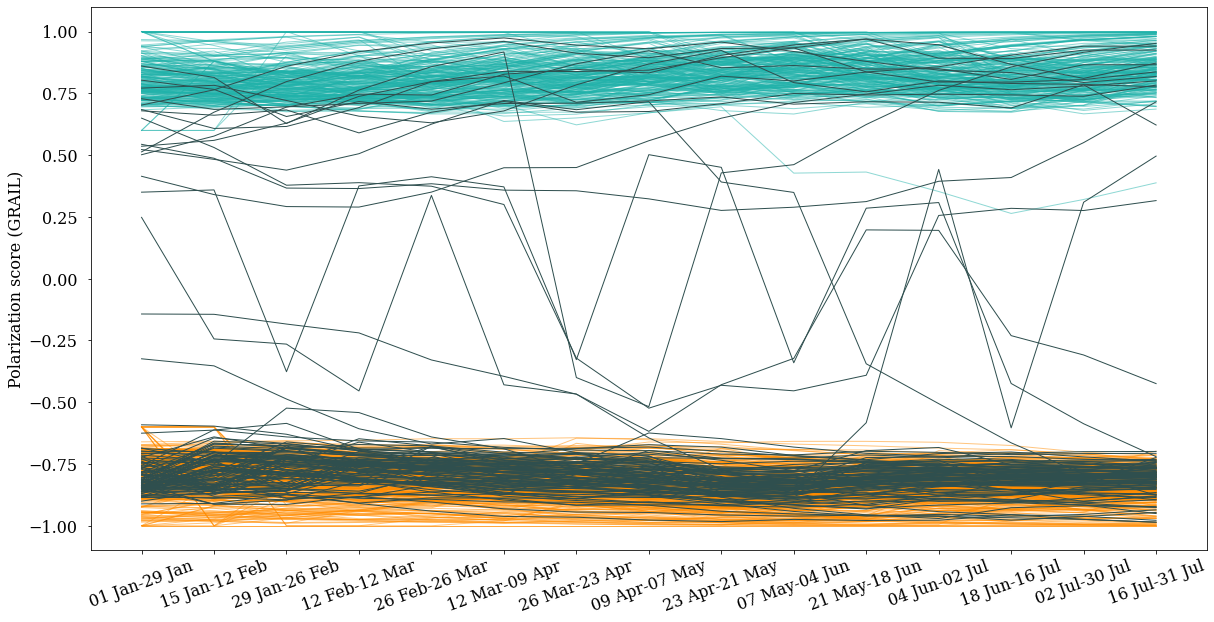

In [191]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(grail_temporal[provax_only_users],color='lightseagreen', linewidth=1, alpha=0.5)
ax.plot(grail_temporal[antivax_only_users],color='darkorange', linewidth=1, alpha=0.5)
ax.plot(grail_temporal[inter_users],color='darkslategrey', linewidth=1)
#ax.plot(GRAIL_vacc[inter_antivax_users],color='darkorange', linewidth=1)


#ax.set_title('Evolution of GRAIL')
ax.set_ylabel('Polarization score (GRAIL)', fontsize=16)
#labels = [i for i in range(1, 16, 1)]
labels = []
for p in range(len(periods)):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)

plt.show()

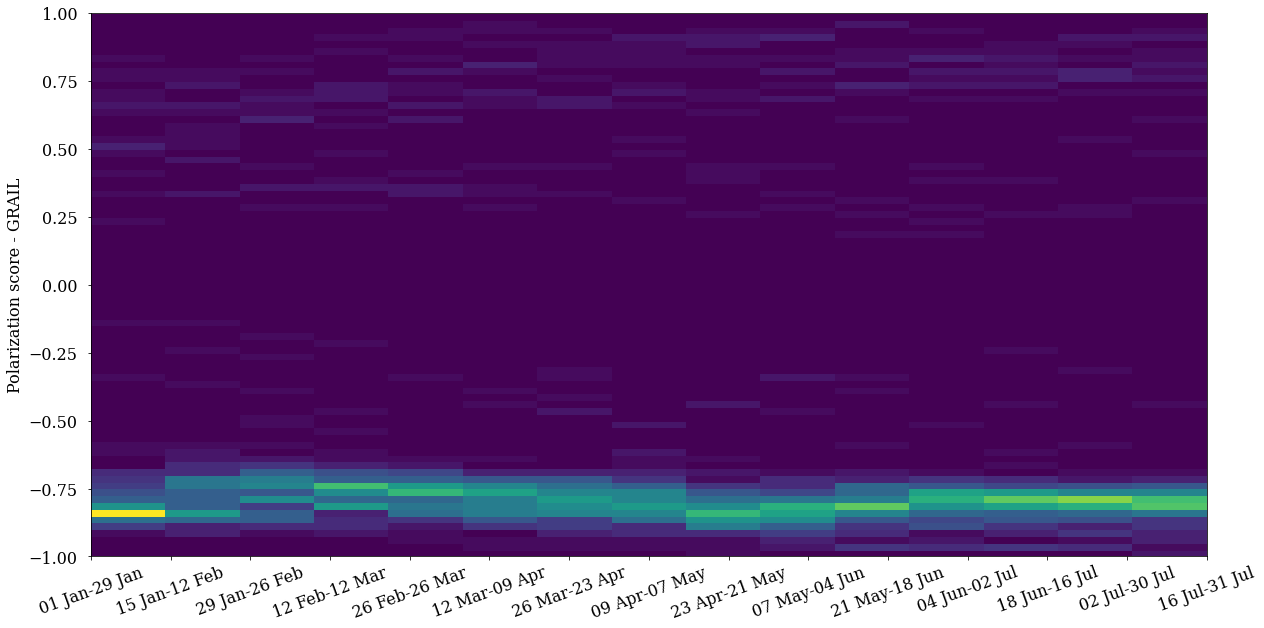

In [193]:
fig, ax = plt.subplots(figsize=(20,10))
im = dense_lines(ys=np.array(grail_temporal[inter_users].T.values), x=np.array(grail_temporal[inter_users].index), ax=ax, ny=80, cmap='viridis')
ax.set_ylim(-1,1)
labels = []
for p in range(0,15,1):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
ax.set_ylabel('Polarization score - GRAIL', fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)
plt.show()

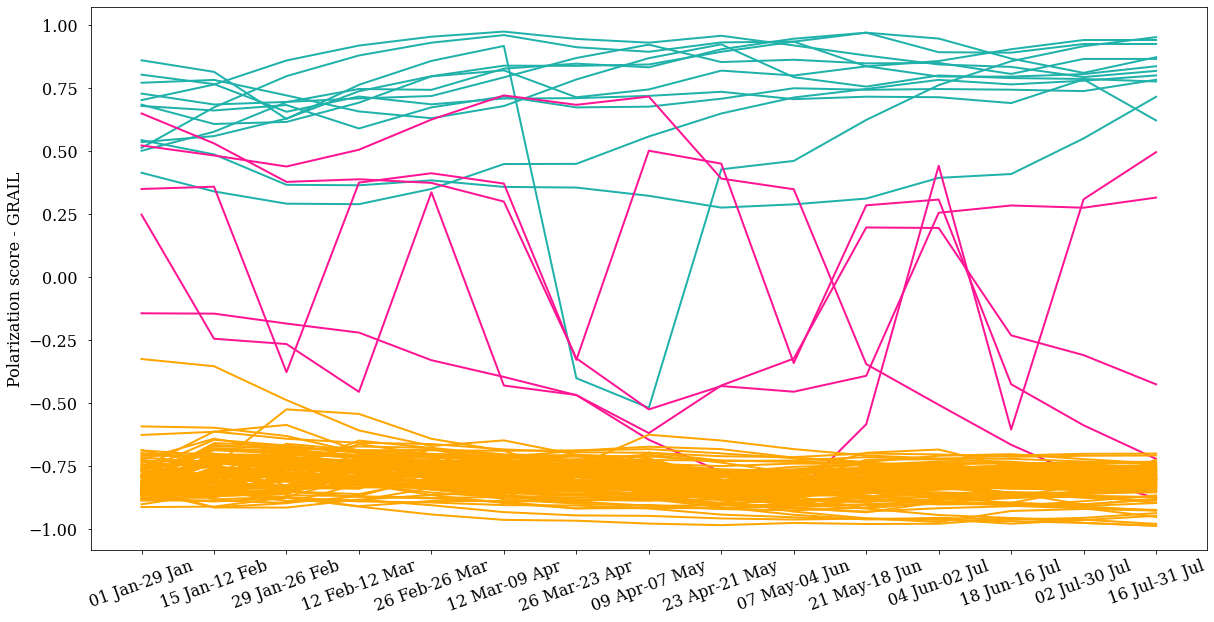

In [198]:
fig, ax = plt.subplots(figsize=(20,10))
colors = ['lightseagreen','deeppink','orange','orange']
for k in range(grail_temporal['cluster_kmeans'].nunique()):
    df = dynamics[dynamics['cluster_kmeans']==k].iloc[:, :15].T
    ax.plot(df, color=colors[k], linewidth=2)
    #sample = df.sample(3, axis='columns')
    #ax.plot(sample, color=colors[k], linewidth=2)
    # for i in range(km.cluster_centers_.shape[0]):
    #     ax.plot(km.cluster_centers_[i], linewidth = 3.0, label='cluster_'+str(i))
    #ax.legend()
    #ax.set_xlabel('Time frame')
    ax.set_ylabel('Polarization score - GRAIL', fontsize=16)
    #labels = [i for i in range(1, 16, 1)]
    labels = []
    for p in range(len(periods)):
        label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
        labels.append(label)
    ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
    ax.tick_params(axis='y', labelsize=16, pad=10)

plt.show()

Coeff [0.02369812]
Interception 0.6399675704922427
R² 0.6243899657863359
Coeff [-0.03731141]
Interception -0.43446721705150154
R² 0.8402794148410113


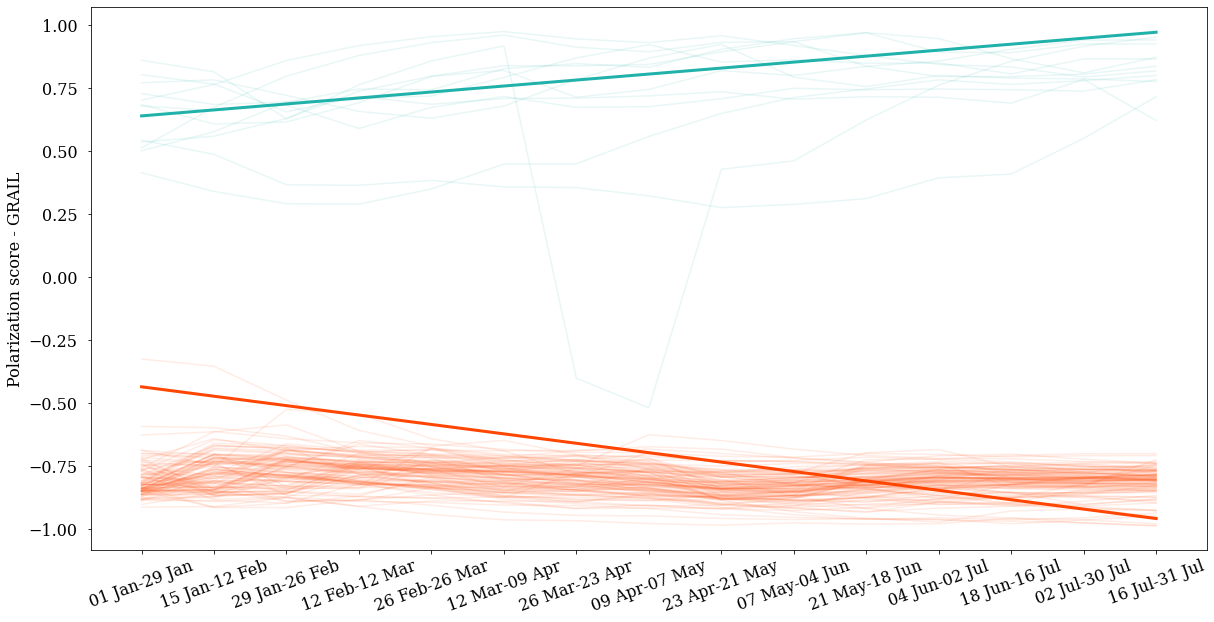

In [233]:
fig, ax = plt.subplots(figsize=(20,10))
#ax.plot(df.iloc[:, :15].T, color='grey', linewidth=0.05)
colors = {0:'lightseagreen', 1:'blue', 2:'orangered'}

for i in [0,2]:
    #ax.plot(km.cluster_centers_[i], linewidth = 3.0, label='cluster_'+str(i))
    
    cluster_sequences = np.array(dynamics[dynamics['cluster_kmeans']==i].iloc[:, :15])
    for seq in cluster_sequences:
        plt.plot(seq.ravel(), color=colors[i], alpha=0.1)
    
    model = LinearRegression()
    model.fit(np.arange(len(cluster_sequences[0])).reshape(-1,1), cluster_sequences[0].ravel())
    print('Coeff', model.coef_)
    print('Interception', model.intercept_)
    print('R²', model.score(np.arange(len(cluster_sequences[0])).reshape(-1,1), cluster_sequences[0].ravel()))
    trend_line = model.predict(np.arange(len(cluster_sequences[0])).reshape(-1,1))
    plt.plot(trend_line, 'r', color=colors[i], linewidth=3)
labels = []
for p in range(0,15,1):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
#plt.xlabel('Periods')
plt.ylabel('Polarization score - GRAIL', fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)

# plt.title('Linear Regression')
plt.show()

## Ukraine conflict debate

In [104]:
#Définition des listes d'utilisateurs
inter_users = []
proU_users = []
proR_users = []
for u in users:
    if clusters[u].eq('inter').any() == True:
        inter_users.append(u)
    if clusters.loc[3, u] == 'proU':
        proU_users.append(u)
    if clusters.loc[3, u] == 'proR':
        proR_users.append(u)

In [105]:
print('Inter :', len(inter_users))
print('ProU :', len(proU_users))
print('ProR :', len(proR_users))

Inter : 76
ProU : 317
ProR : 391


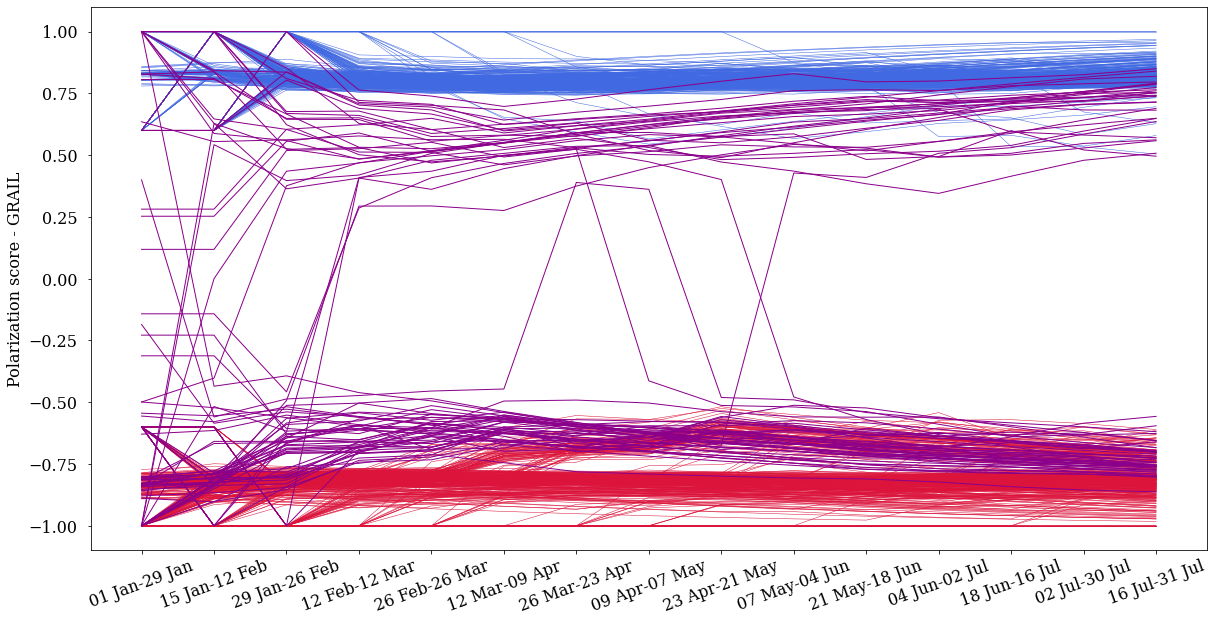

In [106]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(grail_temporal[proR_users],color='crimson', linewidth=0.5)
ax.plot(grail_temporal[proU_users],color='royalblue', linewidth=0.5)
ax.plot(grail_temporal[inter_users],color='darkmagenta', linewidth=1)


#ax.set_title('Evolution of GRAIL')
ax.set_ylabel('Polarization score - GRAIL', fontsize=16)
#labels = [i for i in range(1, 16, 1)]
labels = []
for p in range(len(periods)):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)

plt.show()

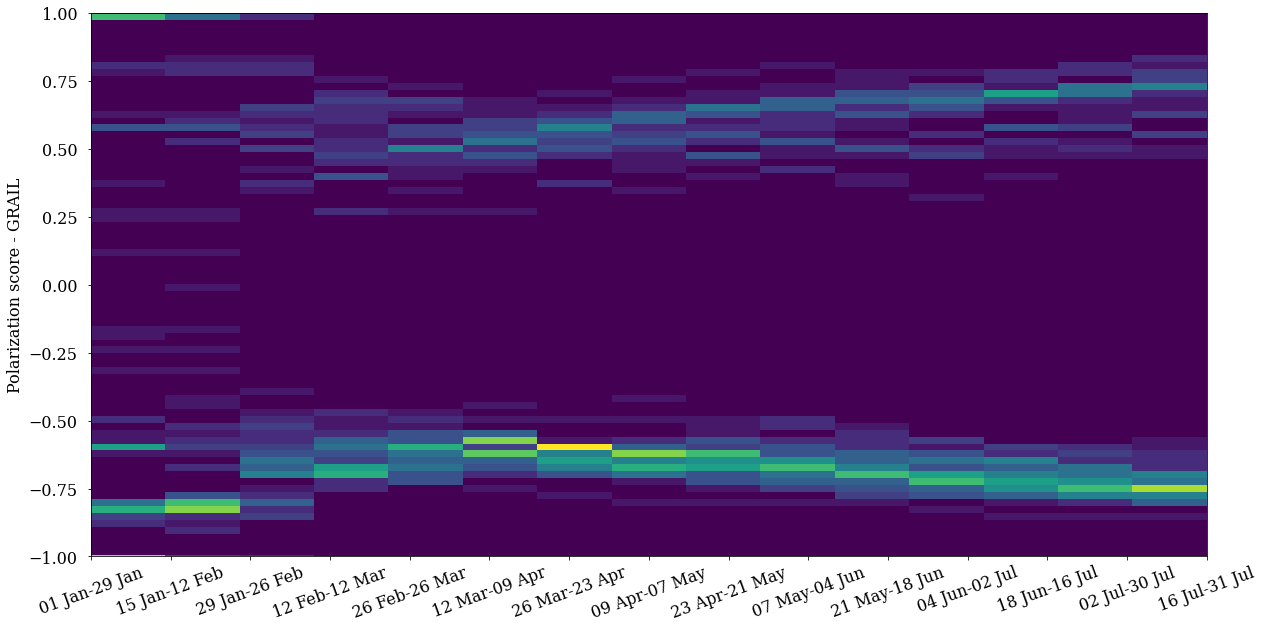

In [107]:
fig, ax = plt.subplots(figsize=(20,10))
im = dense_lines(ys=np.array(grail_temporal[inter_users].T.values), x=np.array(grail_temporal[inter_users].index), ax=ax, ny=80, cmap='viridis')
ax.set_ylim(-1,1)
labels = []
for p in range(0,15,1):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
ax.set_ylabel('Polarization score - GRAIL', fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)

plt.show()

In [108]:
dynamics['cluster_kmeans'].value_counts()

3    44
2    20
0     8
1     4
Name: cluster_kmeans, dtype: int64

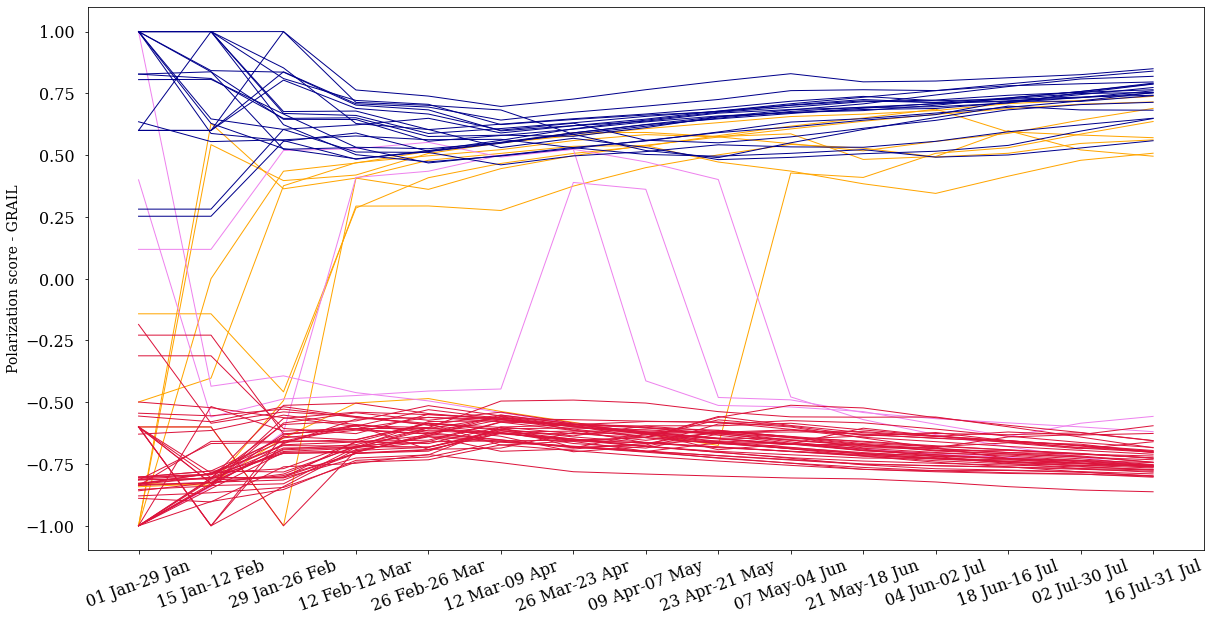

In [114]:
fig, ax = plt.subplots(figsize=(20,10))
colors = ['orange','violet','darkblue','crimson']
for k in range(dynamics['cluster_kmeans'].nunique()):
    df = dynamics[dynamics['cluster_kmeans']==k].iloc[:, :15].T
    ax.plot(df, color=colors[k], linewidth=1)
    ax.set_ylabel('Polarization score - GRAIL', fontsize=14)
    labels = []
    for p in range(len(periods)):
        label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
        labels.append(label)
    ax.set_xticks(np.arange(0,15,1),labels, rotation = 20, fontsize=16)
    ax.tick_params(axis='y', labelsize=16, pad=10)   
plt.show()

Coeff [-0.0140462]
Interception -0.6507670785665107
R² 0.944049994193524
Coeff [0.02276576]
Interception 0.540622935235298
R² 0.9644257885371849


C:\Users\CTREUI~1.BID\AppData\Local\Temp/ipykernel_2208/594074590.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.

C:\Users\CTREUI~1.BID\AppData\Local\Temp/ipykernel_2208/594074590.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.



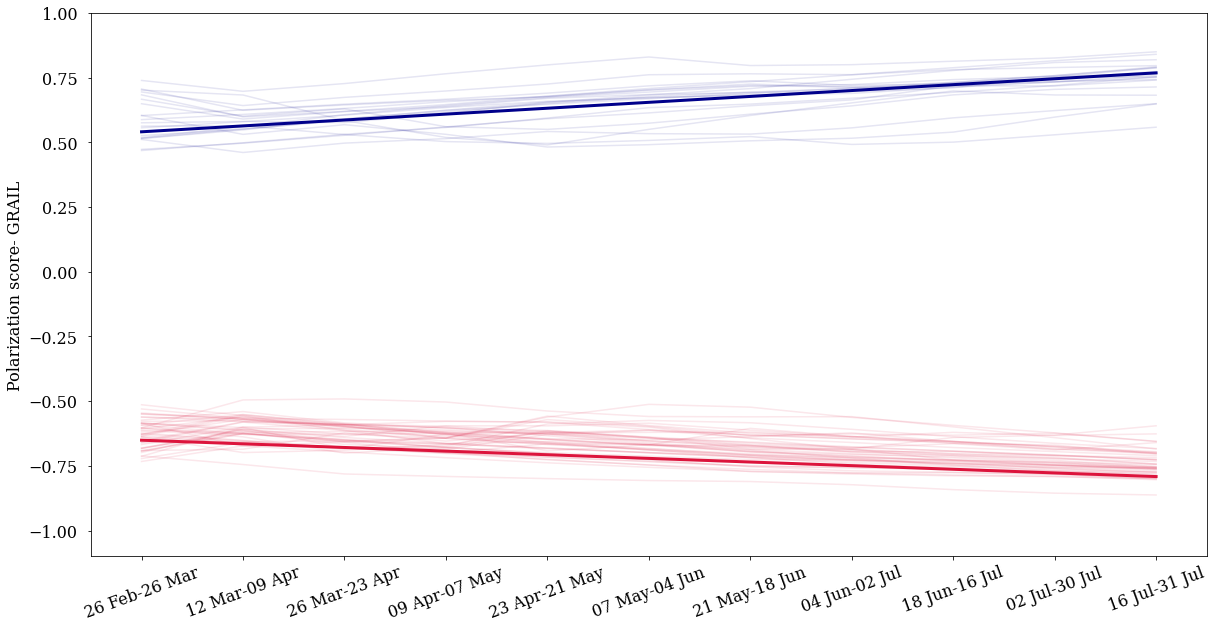

In [115]:
fig, ax = plt.subplots(figsize=(20,10))
#ax.plot(df.iloc[:, :15].T, color='grey', linewidth=0.05)
colors = {3:'crimson', 2:'darkblue'}

for i in [3,2]:
    #ax.plot(km.cluster_centers_[i], linewidth = 3.0, label='cluster_'+str(i))
    
    cluster_sequences = np.array(dynamics[dynamics['cluster_kmeans']==i].iloc[:, 4:-1])
    for seq in cluster_sequences:
        plt.plot(seq.ravel(), color=colors[i], alpha=0.1)
    
    model = LinearRegression()
    model.fit(np.arange(len(cluster_sequences[0])).reshape(-1,1), cluster_sequences[0].ravel())
    print('Coeff', model.coef_)
    print('Interception', model.intercept_)
    print('R²', model.score(np.arange(len(cluster_sequences[0])).reshape(-1,1), cluster_sequences[0].ravel()))
    trend_line = model.predict(np.arange(len(cluster_sequences[0])).reshape(-1,1))
    plt.plot(trend_line, 'r', color=colors[i], linewidth=3)
labels = []
for p in range(4,15,1):
    label = periods[p][0].strftime('%d %b')+'-'+periods[p][1].strftime('%d %b')
    labels.append(label)
ax.set_xticks(np.arange(0,11,1),labels, rotation = 20, fontsize=16)
ax.tick_params(axis='y', labelsize=16, pad=10)

plt.ylim(-1.1,1)
# plt.xlabel('Periods')
plt.ylabel('Polarization score- GRAIL', fontsize=16)
# plt.title('Linear Regression')
plt.show()